# 1. Supervised Learning

## Utils

In [18]:
def model_evaluation(task, model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if task == "classification":
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
        return accuracy, precision, recall, f1
    else:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print(f"{model_name} - Validation MSE: {mse}, MAE: {mae}, MAPE: {mape}")
        return mse, mae, mape

## 1) Classification

### Package

In [ ]:
# package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_iris

### Load Dataset

In [3]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Data Pre-processing
# 
scaler = StandardScaler()  
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [8]:
scaled_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [9]:
scaled_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [10]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

### Models

In [11]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

### Training & Evaluation

In [15]:
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = model_evaluation(task="classification",
                                                       model=model, model_name=model_name,
                                                       X_train=X_train, X_test=X_test,
                                                       y_train=y_train, y_test=y_test)
    results[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
    }

KNN - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
SVM - Accuracy: 0.9666666666666667, Precision: 0.9694444444444444, Recall: 0.9666666666666667, F1 Score: 0.9664109121909632
Random Forest - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Gradient Boosting - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


### Comparison of Performance

In [17]:
classification_results = pd.DataFrame(results).T
classification_results

,Accuracy,Precision,Recall,F1 Score
KNN,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
SVM,0.966667,0.969444,0.966667,0.966411
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000


## 2) Regression

### Package

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.datasets import load_diabetes

### Load Data

In [20]:
regression_data = load_diabetes()
X_reg = pd.DataFrame(regression_data.data, columns=regression_data.feature_names)
y_reg = pd.Series(regression_data.target, name='target')

In [21]:
X_reg.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [22]:
X_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [23]:
X_reg.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [24]:
# Data Pre-processing
Scaled_X_reg = pd.DataFrame(scaler.fit_transform(X_reg), columns=X_reg.columns)

In [25]:
# Split into Train/Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(Scaled_X_reg, y_reg, test_size=0.2, random_state=42)


### Models

In [26]:
## Define Models
regression_models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'SVM': SVR(kernel='linear'),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

### Training & Evaluation

In [28]:
results = {}
for model_name, model in models.items():
    mse, mae, mape = model_evaluation(task="regression",
                                        model=model, model_name=model_name,
                                        X_train=X_train_reg, X_test=X_test_reg,
                                        y_train=y_train_reg, y_test=y_test_reg)
    results[model_name] = {
    'MSE': round(mse, 3),
    'MAE': round(mae, 3),
    'MAPE': round(mape, 3)
    }

KNN - Validation MSE: 7182.067415730337, MAE: 66.49438202247191, MAPE: 0.4102713395618905
Decision Tree - Validation MSE: 5631.494382022472, MAE: 58.01123595505618, MAPE: 0.4492059364404887
SVM - Validation MSE: 3998.258426966292, MAE: 48.86516853932584, MAPE: 0.3833677089600723
Random Forest - Validation MSE: 5279.449438202248, MAE: 55.2247191011236, MAPE: 0.454769917720641
Gradient Boosting - Validation MSE: 7779.550561797752, MAE: 71.32584269662921, MAPE: 0.5927797410108372


### Comparison of Performance

In [29]:
regression_comparison = pd.DataFrame(results).T
regression_comparison

,MSE,MAE,MAPE
KNN,7182.067,66.494,0.410
Decision Tree,5631.494,58.011,0.449
SVM,3998.258,48.865,0.383
Random Forest,5279.449,55.225,0.455
Gradient Boosting,7779.551,71.326,0.593


## 2. Unsupervised Learning

## 1) Hierarchical Clustering

### Package

In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram

### Load Data

In [33]:
X, y = make_blobs(random_state=0, n_samples=11)

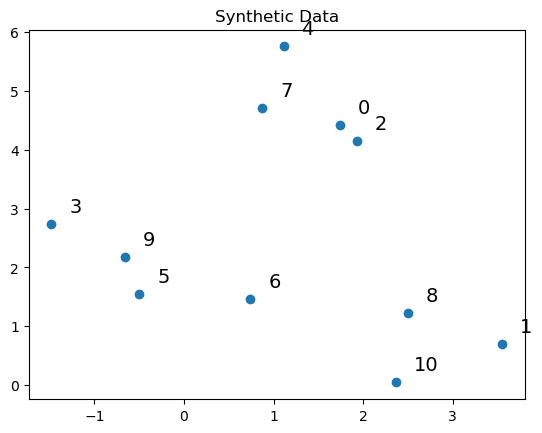

In [34]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic Data")
labels = [str(label) for label in range(len(X))]
for i, txt in enumerate(labels):
    plt.annotate(txt, X[i], xytext=X[i] + 0.2, size = 14)

### Clustering

In [35]:
linkage_array = ward(X)
linkage_array

array([[ 0.        ,  2.        ,  0.3320945 ,  2.        ],
       [ 5.        ,  9.        ,  0.64580193,  2.        ],
       [ 4.        ,  7.        ,  1.07256525,  2.        ],
       [ 1.        ,  8.        ,  1.1803787 ,  2.        ],
       [10.        , 14.        ,  1.30311575,  3.        ],
       [ 3.        , 12.        ,  1.4440339 ,  3.        ],
       [11.        , 13.        ,  1.78595107,  4.        ],
       [ 6.        , 16.        ,  2.15981886,  4.        ],
       [15.        , 18.        ,  6.55024854,  7.        ],
       [17.        , 19.        ,  7.63663025, 11.        ]])

Text(0, 0.5, 'Ward Linkage Distance')

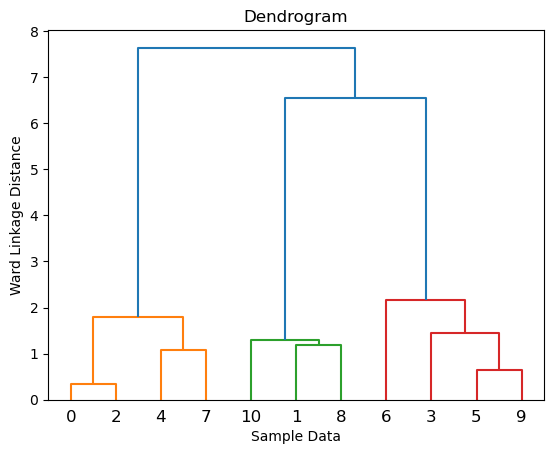

In [37]:
dendrogram(linkage_array)
plt.title("Dendrogram")
plt.xlabel("Sample Data")
plt.ylabel("Ward Linkage Distance")

## 2) K-means Clustering

In [41]:
from sklearn.datasets import make_blobs, make_moons, load_digits
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

### Load Data

In [42]:
X_blobs, y_blobs = make_blobs(n_samples=300,
                              centers=4,
                              cluster_std=0.60,
                              random_state=0)
X_moons, y_moons = make_moons(n_samples=200,
                              noise=0.05,
                              random_state=42)
digits = load_digits()
X_digits, y_digits = digits.data, digits.target


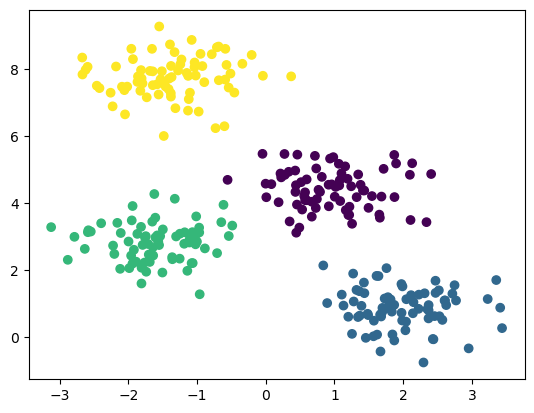

In [43]:
# Visualization (make_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c = y_blobs)

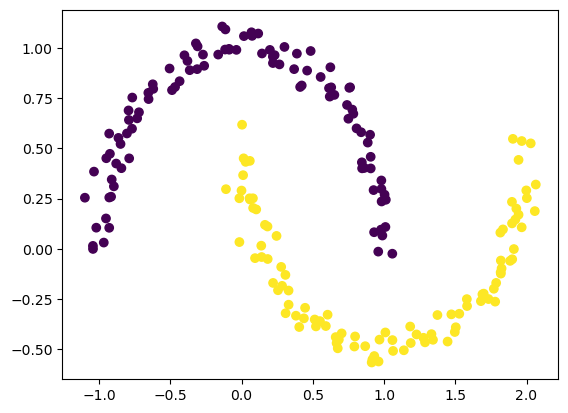

In [44]:
# Visualization (make_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c = y_moons)

X_digits.shape: (1797, 64), y_digits: [0 1 2 3 4 5 6 7 8 9]


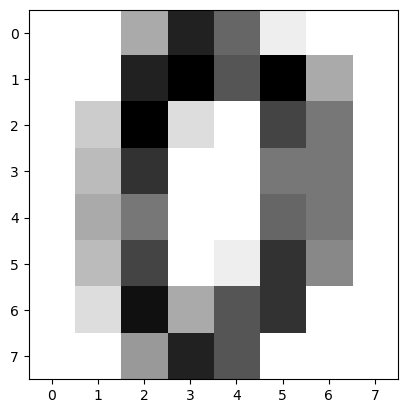

In [48]:
# Visualization (load_digits)
print(f"X_digits.shape: {X_digits.shape}, y_digits: {np.unique(y_digits)}")

img = X_digits.reshape(1797, 8, 8)
plt.imshow(img[0], cmap=plt.cm.binary)

### Clustering

c:\Users\fkid0\anaconda3\envs\Any\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fkid0\anaconda3\envs\Any\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fkid0\anaconda3\envs\Any\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fkid0\anaconda3\envs\Any\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is k

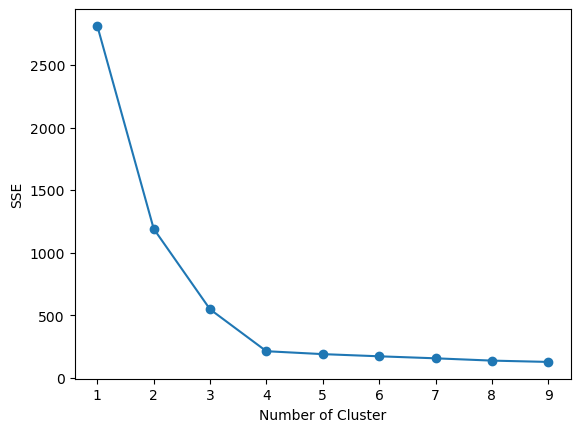

In [53]:
# Searching optimal the number of custer
sse = []
iter = 10

for i in range(1, iter):
    kmeans = KMeans(n_clusters=i, init="random",
                    n_init = "auto", max_iter=100,
                    tol=1e-04, random_state=0)
    kmeans.fit(X_blobs)
    sse.append(kmeans.inertia_)
plt.plot(range(1, iter), sse, marker = "o")
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [54]:
# Clustering (make_blobs)
kmeans = KMeans(n_clusters=4, n_init="auto", random_state=0)
kmeans.fit(X_blobs)

c:\Users\fkid0\anaconda3\envs\Any\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

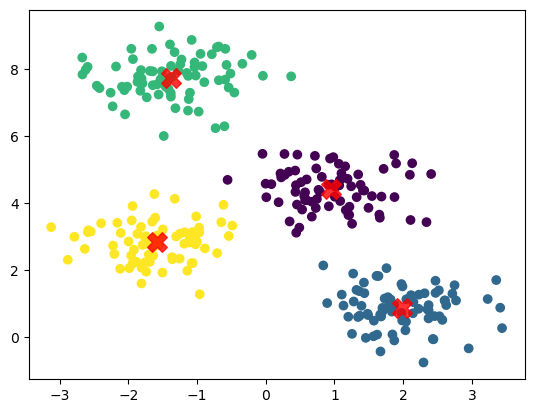

In [55]:
# Clustering Visualization (make_blobs)

y_blobs_pred = kmeans.predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="X", c="Red", s=200, alpha=0.8)

In [56]:
# Clustering (make_moons)
kmeans = KMeans(n_clusters=2, n_init="auto", random_state=0)
kmeans.fit(X_moons)

c:\Users\fkid0\anaconda3\envs\Any\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=0)

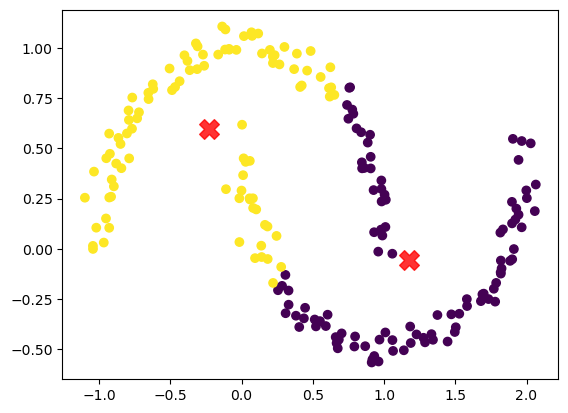

In [57]:
# Clustering Visualization (make_moons)
y_moons_pred = kmeans.predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="X", c="Red", s=200, alpha=0.8)

In [58]:
# Clustering (digits)
kmeans = KMeans(n_clusters=10, n_init="auto", random_state=0)
kmeans.fit(X_digits)

KMeans(n_clusters=10, n_init='auto', random_state=0)

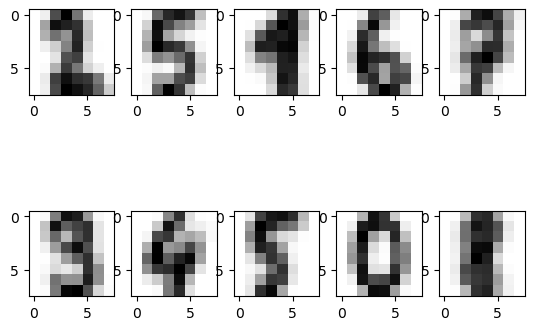

In [59]:
# Clustering Visualization (digits)
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

fig = plt.figure()

for i in range(10):
    axes = fig.add_subplot(2, 5, i + 1)
    axes.imshow(centers[i], cmap=plt.cm.binary)

## 3) Distribution-based Clustering

In [60]:
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

### Load Data

In [61]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.08, random_state=42)
X_circles, y_circles = make_circles(n_samples=200, noise=0.05, factor=0.4)

### Clustering

In [62]:
# Clustering (make_moons)
dbscan = DBSCAN(eps = 0.2)
dbscan.fit(X_moons)

DBSCAN(eps=0.2)

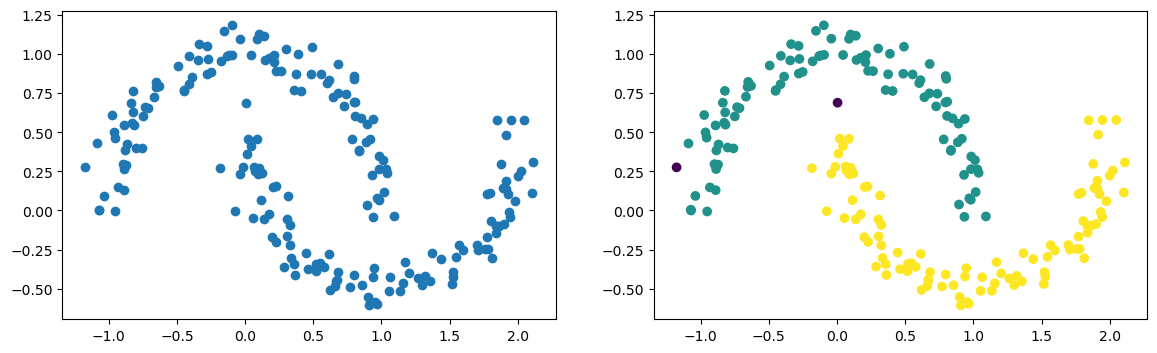

In [63]:
# Clustering Visualization (make_moons)
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
axes[0].scatter(X_moons[:, 0], X_moons[:, 1])
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c = dbscan.labels_)

In [64]:
# Clustering (make_circles)
dbscan = DBSCAN(eps = 0.3, min_samples=3)
dbscan.fit(X_circles)

DBSCAN(eps=0.3, min_samples=3)

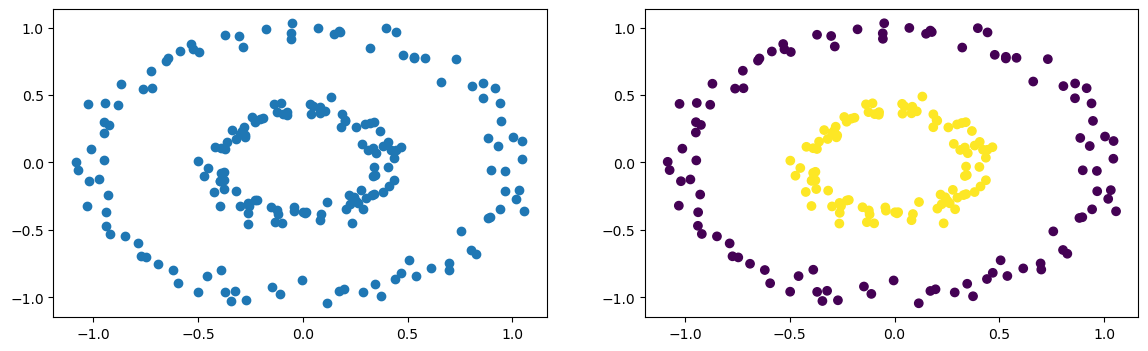

In [65]:
# Clustering Visualization (make_circles)
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
axes[0].scatter(X_circles[:, 0], X_circles[:, 1])
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c = dbscan.labels_)